# Analysis of Pipeline Accidents in the US between 2013 to 2016

<b>Datasource and description</b> : https://www.kaggle.com/usdot/pipeline-accidents


## The Data Science Process

The following analysis will follow thje CrossIndustry Process for data m,ining (CRISPDM) pipeline. <br>
The 6 majopr phases are

1. Business understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Results and Evaluation 
6. Deployment 



## 1.Business Understanding

This analysis is set to answer the following questions:
- What is the major cause of pipeline accidents?
- What time of the year is pipeline accidents common? (Time Series Analysis)
- What locations do pipeline accidents mostly occur?
- What company (oil operators) most frequently has accidents and what is the reason?
- What type of liquids are usually involved in accidents and cost more on average?
- What factors are related to the quantity of barrel lost and the total amount expended?


##  2. Data Understanding and Preprocessing

Now, we need to understand the data necessary to answer the above questions, and pull out accordingly. We shall then wrangle


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
pd. set_option("display.max_columns", None)

#import warnings
#warnings.filterwarnings('ignore')



#plt.style.use('ggplot')
#import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./database.csv')
df.head(4)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540


In [3]:
df.shape

(2795, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

#### Renaming the columns

to remove whitespaces brackets and slashes

In [5]:
all_col = list(df.columns)
for i in range(len(all_col)):
    all_col[i] = all_col[i].replace(' ', '_')
    all_col[i] = all_col[i].replace('/', '_')
    all_col[i] = all_col[i].replace('(', '')
    all_col[i] = all_col[i].replace(')', '')
    
    
df.columns = all_col

df.head()

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Liquid_Name,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Operator_Employee_Injuries,Operator_Contractor_Injuries,Emergency_Responder_Injuries,Other_Injuries,Public_Injuries,All_Injuries,Operator_Employee_Fatalities,Operator_Contractor_Fatalities,Emergency_Responder_Fatalities,Other_Fatalities,Public_Fatalities,All_Fatalities,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


#### Treating Duplicates

In [6]:
#Checking for duplicates in the data using the unique ID

print("The number of records in the df is {}".format(df.shape[0]))
print()
print("No of unique records in the df (given by report_number) is {}".format(df['Report_Number'].
                                                                                nunique()))

The number of records in the df is 2795

No of unique records in the df (given by report_number) is 2795


There are no duplicates.


In [7]:
#Removing duplicates

#df= df[~df.duplicated()]
#df.shape

#### Finding missing values
We shall be removing columns with an average of 60percent missing values

In [8]:
major_missing = df.columns[df.isnull().mean() > 0.60]
print(major_missing)
to_remove =list(major_missing)

Index(['Liquid_Name', 'Operator_Employee_Injuries',
       'Operator_Contractor_Injuries', 'Emergency_Responder_Injuries',
       'Other_Injuries', 'Public_Injuries', 'All_Injuries',
       'Operator_Employee_Fatalities', 'Operator_Contractor_Fatalities',
       'Emergency_Responder_Fatalities', 'Other_Fatalities',
       'Public_Fatalities', 'All_Fatalities'],
      dtype='object')


In [9]:
(df.isnull().mean())*100

#multiplied by 100 to get answer in percent

Report_Number                            0.000000
Supplemental_Number                      0.000000
Accident_Year                            0.000000
Accident_Date_Time                       0.000000
Operator_ID                              0.000000
Operator_Name                            0.000000
Pipeline_Facility_Name                   4.329159
Pipeline_Location                        0.000000
Pipeline_Type                            0.644007
Liquid_Type                              0.000000
Liquid_Subtype                          51.735242
Liquid_Name                             92.057245
Accident_City                           11.270125
Accident_County                          2.683363
Accident_State                           0.429338
Accident_Latitude                        0.000000
Accident_Longitude                       0.000000
Cause_Category                           0.000000
Cause_Subcategory                        0.000000
Unintentional_Release_Barrels            0.000000


Columns with more than 50% missing data will be dropped

In [10]:
missing_data = df.isnull().mean()

to_drop_list = list(missing_data[missing_data > 0.60].index)

print(to_drop_list)

['Liquid_Name', 'Operator_Employee_Injuries', 'Operator_Contractor_Injuries', 'Emergency_Responder_Injuries', 'Other_Injuries', 'Public_Injuries', 'All_Injuries', 'Operator_Employee_Fatalities', 'Operator_Contractor_Fatalities', 'Emergency_Responder_Fatalities', 'Other_Fatalities', 'Public_Fatalities', 'All_Fatalities']


In [11]:
df.head()

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Liquid_Name,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Operator_Employee_Injuries,Operator_Contractor_Injuries,Emergency_Responder_Injuries,Other_Injuries,Public_Injuries,All_Injuries,Operator_Employee_Fatalities,Operator_Contractor_Fatalities,Emergency_Responder_Fatalities,Other_Fatalities,Public_Fatalities,All_Fatalities,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [12]:
df.drop(to_drop_list, axis=1 ,inplace=True)

In [13]:
df.shape
 

(2795, 35)

In [14]:
(df.isnull().mean())*100

Report_Number                            0.000000
Supplemental_Number                      0.000000
Accident_Year                            0.000000
Accident_Date_Time                       0.000000
Operator_ID                              0.000000
Operator_Name                            0.000000
Pipeline_Facility_Name                   4.329159
Pipeline_Location                        0.000000
Pipeline_Type                            0.644007
Liquid_Type                              0.000000
Liquid_Subtype                          51.735242
Accident_City                           11.270125
Accident_County                          2.683363
Accident_State                           0.429338
Accident_Latitude                        0.000000
Accident_Longitude                       0.000000
Cause_Category                           0.000000
Cause_Subcategory                        0.000000
Unintentional_Release_Barrels            0.000000
Intentional_Release_Barrels             56.744186


In [15]:
df.head(20)

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.00,NO,NO,NO,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.00,NO,NO,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.00,NO,NO,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.00,NO,NO,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.00,NO,NO,NO,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
5,20100021,17161,2010,1/8/2010 11:38 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",NaN,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NECHE,PEMBINA,ND,48.99555,-97.52554,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,3784.00,0.0,1547.00,2237.00,NO,NO,YES,1/8/2010 23:41,1/13/2010 9:17,0.0,76940.0,167775.0,150000.0,1800000.0,2000000.0,0.0,4194715
6,20110036,18052,2010,1/9/2010 12:15 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GASOLINE (NON-ETHANOL),GALENA PARK,HARRIS,TX,29.43050,-95.12010,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,35.00,0.0,30.00,5.00,NO,NO,NO,NaN,NaN,NaN,0.0,400.0,0.0,0.0,70000.0,0.0,70400
7,20100255,18584,2010,1/9/2010 1:12 AM,12624,MOBIL CORP,HULL STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,HULL,LIBERTY,TX,30.08533,-94.38050,NATURAL FORCE DAMAGE,TEMPERATURE,0.24,0.0,0.00,0.24,NO,NO,NaN,NaN,NaN,NaN,400.0,13.0,0.0,0.0,0.0,0.0,413
8,20100261,18050,2010,1/10/2010 7:46 PM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","DIESEL, FUEL OIL, KEROSENE, JET FUEL",NaN,NaN,TX,29.43050,-95.12010,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,0.40,0.0,0.40,0.00,NO,NO,NaN,NaN,NaN,NaN,0.0,336.0,0.0,0.0,40000.0,0.0,40336
9,20100024,18390,2010,1/11/2010 2:30 PM,31684,CONOCOPHILLIPS,TANK 1501,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GASOLINE (NON-ETHANOL),PASADENA,HARRIS,TX,29.71478,-95.17611,ALL OTHER CAUSES,MISCELLANEOUS,0.48,0.0,0.48,0.00,NO,NO,NO,NaN,NaN,NaN,0.0,50.0,0.0,10000.0,10000.0,10000.0,30050


In [16]:
df.dtypes

Report_Number                             int64
Supplemental_Number                       int64
Accident_Year                             int64
Accident_Date_Time                       object
Operator_ID                               int64
Operator_Name                            object
Pipeline_Facility_Name                   object
Pipeline_Location                        object
Pipeline_Type                            object
Liquid_Type                              object
Liquid_Subtype                           object
Accident_City                            object
Accident_County                          object
Accident_State                           object
Accident_Latitude                       float64
Accident_Longitude                      float64
Cause_Category                           object
Cause_Subcategory                        object
Unintentional_Release_Barrels           float64
Intentional_Release_Barrels             float64
Liquid_Recovery_Barrels                 

In [17]:
df.describe()

,Report_Number,Supplemental_Number,Accident_Year,Operator_ID,Accident_Latitude,Accident_Longitude,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,2338.000000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,0.964072,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,18.151398,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,0.000000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,0.000000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,700.000000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


## Treating missing data
We still have to treat misssing data for about 12 columns. 

Pipeline_Facility_Name                  4.32
Pipeline_Type                           0.64
Accident_City                           11.270125
Accident_County                          2.683363
Accident_State 
Pipeline_Shutdown                        7.584973
Public_Evacuations                      16.350626
Property_Damage_Costs                    0.250447
Lost_Commodity_Costs                     0.143113
Public_Private_Property_Damage_Costs     0.357782
Emergency_Response_Costs                 0.214669
Environmental_Remediation_Costs          0.286225
Other_Costs            




NB: In this analysis, we will deal with only total cost. so therefore, we will remove every other columns that has to do with costs.

For numeric col, we shall fill with mean or median.
 - Skewed column, fill with median as mean is not robust to outliers
 - Symmetric column, fill with mean.

For categorical column fill with mode
 

In [18]:
cat_list = ["Pipeline_Facility_Name", "Pipeline_Type", "Accident_City", "Accident_County", "Accident_State",
            "Pipeline_Shutdown"]



skewed_list = []
symmetric_list = []



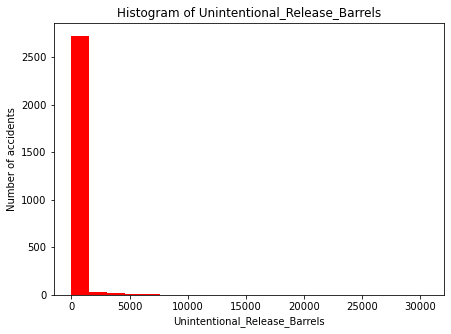

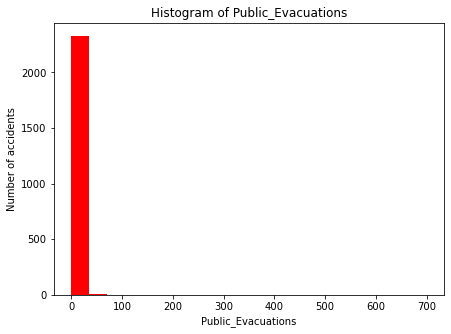

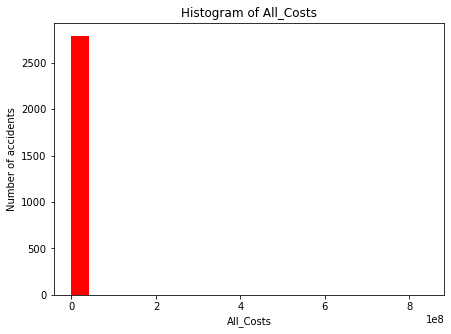

'\nfor i in num_list:\n    sns.displot(df[i], kde=True, bins = 20)\n    plt.show()\n'

In [19]:
#Distribution plot to find out skewed n symmetric columns
    
num_lista = ['Unintentional_Release_Barrels', 'Public_Evacuations','All_Costs']

def histogram_plot(df, num_cols, bins = 20):
    for num_col in num_cols:
        fig = plt.figure(figsize=(7,5)) # define plot area
        ax = fig.gca() # define axis    
        df[num_col].plot.hist(ax = ax, bins = bins, color='r') # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + num_col) # Give the plot a main title
        ax.set_xlabel(num_col) # Set text for the x axis
        ax.set_ylabel('Number of accidents')# Set text for y axis
        plt.show()
        
        
histogram_plot(df, num_cols=num_lista)
 
    
    
    
    
''' 
#Alternatively

def plot_density_hist(df, num_cols, bins = 10, hist = True):
    for num_col in num_cols:
        sns.set_style("whitegrid")
        sns.distplot(df[num_col], bins = bins, rug=False, hist = hist)
        plt.title('Histogram of ' + num_col) # Give the plot a main title
        plt.xlabel(num_col) # Set text for the x axis
        plt.ylabel('Number of accidents')# Set text for y axis
        plt.show()

plot_density_hist(df, num_cols=num_lista)

'''   

'''
for i in num_list:
    sns.displot(df[i], kde=True, bins = 20)
    plt.show()
'''    

These three columns are all right skewed. It is better to fill with median.

In [20]:
num_list =['Public_Evacuations',
 'Property_Damage_Costs',
 'Lost_Commodity_Costs',
 'Emergency_Response_Costs',
 'Environmental_Remediation_Costs',
 'Other_Costs',
 'Public_Private_Property_Damage_Costs']

In [21]:
for i in cat_list:
    df[i].fillna(str(df[i].mode().iloc[0]), inplace=True)
    
for j in num_list:
    df[j].fillna(df[j].median(), inplace=True)
        
    

In [22]:
num_list


['Public_Evacuations',
 'Property_Damage_Costs',
 'Lost_Commodity_Costs',
 'Emergency_Response_Costs',
 'Environmental_Remediation_Costs',
 'Other_Costs',
 'Public_Private_Property_Damage_Costs']

In [23]:
(df.isnull().mean())*100

Report_Number                            0.000000
Supplemental_Number                      0.000000
Accident_Year                            0.000000
Accident_Date_Time                       0.000000
Operator_ID                              0.000000
Operator_Name                            0.000000
Pipeline_Facility_Name                   0.000000
Pipeline_Location                        0.000000
Pipeline_Type                            0.000000
Liquid_Type                              0.000000
Liquid_Subtype                          51.735242
Accident_City                            0.000000
Accident_County                          0.000000
Accident_State                           0.000000
Accident_Latitude                        0.000000
Accident_Longitude                       0.000000
Cause_Category                           0.000000
Cause_Subcategory                        0.000000
Unintentional_Release_Barrels            0.000000
Intentional_Release_Barrels             56.744186


In [24]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Report_Number,20100016,20100254,20100038,20100260,20100030,20100021,20110036,20100255,20100261,20100024,20100150,20100262,20100234,20100026,20100106,20100082,20100037,20100025,20110071,20100100
Supplemental_Number,17305,17331,17747,18574,16276,17161,18052,18584,18050,18390,15205,15399,18134,17874,17751,17824,18592,17505,18051,17975
Accident_Year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
Accident_Date_Time,1/1/2010 7:15 AM,1/4/2010 8:30 AM,1/5/2010 10:30 AM,1/6/2010 7:30 PM,1/7/2010 1:00 PM,1/8/2010 11:38 PM,1/9/2010 12:15 AM,1/9/2010 1:12 AM,1/10/2010 7:46 PM,1/11/2010 2:30 PM,1/11/2010 2:30 PM,1/11/2010 2:47 PM,1/11/2010 3:00 PM,1/11/2010 11:00 PM,1/12/2010 10:25 AM,1/12/2010 2:30 PM,1/12/2010 7:08 PM,1/13/2010 7:36 AM,1/13/2010 1:30 PM,1/13/2010 3:30 PM
Operator_ID,32109,15786,20160,11169,300,11169,26041,12624,26041,31684,32296,31454,9175,31684,26085,32080,12105,31174,26041,22855
Operator_Name,ONEOK NGL PIPELINE LP,PORTLAND PIPELINE CORP,"PETROLOGISTICS OLEFINS, LLC","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","PLAINS PIPELINE, L.P.","ENBRIDGE ENERGY, LIMITED PARTNERSHIP","KINDER MORGAN LIQUID TERMINALS, LLC",MOBIL CORP,"KINDER MORGAN LIQUID TERMINALS, LLC",CONOCOPHILLIPS,TARGA RESOURCES OPERATING LP,"NUSTAR LOGISTICS, L.P.",JAYHAWK PIPELINE LLC,CONOCOPHILLIPS,"PLAINS MARKETING, L.P.","CCPS TRANSPORTATION, LLC","MAGELLAN AMMONIA PIPELINE, L.P.","SHELL PIPELINE CO., L.P.","KINDER MORGAN LIQUID TERMINALS, LLC","KOCH PIPELINE COMPANY, L.P."
Pipeline_Facility_Name,KINDER MORGAN JCT,24-INCH MAIN LINE,WYOMING PIPELINE COMPANY,SUPERIOR TERMINAL,RED RIVER EAST,WYOMING PIPELINE COMPANY,WYOMING PIPELINE COMPANY,HULL STATION,WYOMING PIPELINE COMPANY,TANK 1501,N-4 LINE (NORMAL BUTANE),"46P HOUSTON 12"" REFINDED PRODUCTS PL",CHASE KAW TERMINAL,TANK 824,CUSHING TERMINAL,"CCPS TRANSPORTATION, RUSH STATION","MAGELLAN AMMONIA PIPELINE, LP",SORRENTO DOME,WYOMING PIPELINE COMPANY,PARK RAPIDS PUMP STATION
Pipeline_Location,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE,ONSHORE
Pipeline_Type,ABOVEGROUND,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,TANK,UNDERGROUND,UNDERGROUND,UNDERGROUND,TANK,ABOVEGROUND,ABOVEGROUND,UNDERGROUND,ABOVEGROUND,TANK,ABOVEGROUND
Liquid_Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",CRUDE OIL,CRUDE OIL,CRUDE OIL,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL,CRUDE OIL,CRUDE OIL,CRUDE OIL,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS","REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",CRUDE OIL


In [25]:
df.dtypes

Report_Number                             int64
Supplemental_Number                       int64
Accident_Year                             int64
Accident_Date_Time                       object
Operator_ID                               int64
Operator_Name                            object
Pipeline_Facility_Name                   object
Pipeline_Location                        object
Pipeline_Type                            object
Liquid_Type                              object
Liquid_Subtype                           object
Accident_City                            object
Accident_County                          object
Accident_State                           object
Accident_Latitude                       float64
Accident_Longitude                      float64
Cause_Category                           object
Cause_Subcategory                        object
Unintentional_Release_Barrels           float64
Intentional_Release_Barrels             float64
Liquid_Recovery_Barrels                 

#### Working with Time and Date Features

In [26]:
#Converting the accidentdatetime from object to datetime to make it easy to work with
df['Accident_Date_Time'] = pd.to_datetime(df['Accident_Date_Time'])

In [27]:
df.dtypes

Report_Number                                    int64
Supplemental_Number                              int64
Accident_Year                                    int64
Accident_Date_Time                      datetime64[ns]
Operator_ID                                      int64
Operator_Name                                   object
Pipeline_Facility_Name                          object
Pipeline_Location                               object
Pipeline_Type                                   object
Liquid_Type                                     object
Liquid_Subtype                                  object
Accident_City                                   object
Accident_County                                 object
Accident_State                                  object
Accident_Latitude                              float64
Accident_Longitude                             float64
Cause_Category                                  object
Cause_Subcategory                               object
Unintentio

In [28]:
#To disintegrate the datetime column into year, month, dateofmonth, dayof week, and hour for easy analysis

#df['Year'] = df['Accident_Date_Time'].dt.year

df['Month'] = df['Accident_Date_Time'].dt.month

df['Day'] = df['Accident_Date_Time'].dt.day

df['Hour'] = df['Accident_Date_Time'].dt.hour

df['Weekday'] = df['Accident_Date_Time'].dt.weekday

In [29]:
df.head(1).T

,0
Report_Number,20100016
Supplemental_Number,17305
Accident_Year,2010
Accident_Date_Time,2010-01-01 07:15:00
Operator_ID,32109
Operator_Name,ONEOK NGL PIPELINE LP
Pipeline_Facility_Name,KINDER MORGAN JCT
Pipeline_Location,ONSHORE
Pipeline_Type,ABOVEGROUND
Liquid_Type,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS"


We see that the day of week is represented in digit. Let us convert to strings. 


In [30]:
day_map = {0:'Mon',1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Weekday'] = df['Weekday'].map(day_map)

In [31]:
df.columns

Index(['Report_Number', 'Supplemental_Number', 'Accident_Year',
       'Accident_Date_Time', 'Operator_ID', 'Operator_Name',
       'Pipeline_Facility_Name', 'Pipeline_Location', 'Pipeline_Type',
       'Liquid_Type', 'Liquid_Subtype', 'Accident_City', 'Accident_County',
       'Accident_State', 'Accident_Latitude', 'Accident_Longitude',
       'Cause_Category', 'Cause_Subcategory', 'Unintentional_Release_Barrels',
       'Intentional_Release_Barrels', 'Liquid_Recovery_Barrels',
       'Net_Loss_Barrels', 'Liquid_Ignition', 'Liquid_Explosion',
       'Pipeline_Shutdown', 'Shutdown_Date_Time', 'Restart_Date_Time',
       'Public_Evacuations', 'Property_Damage_Costs', 'Lost_Commodity_Costs',
       'Public_Private_Property_Damage_Costs', 'Emergency_Response_Costs',
       'Environmental_Remediation_Costs', 'Other_Costs', 'All_Costs', 'Month',
       'Day', 'Hour', 'Weekday'],
      dtype='object')

In [32]:
# month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# df['Month'] = df['Month'].map(month_map)

In [33]:
df.head()

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs,Month,Day,Hour,Weekday
0,20100016,17305,2010,2010-01-01 07:15:00,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627,1,1,7,Fri
1,20100254,17331,2010,2010-01-04 08:30:00,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,YES,NaN,NaN,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,4008,1,4,8,Mon
2,20100038,17747,2010,2010-01-05 10:30:00,20160,"PETROLOGISTICS OLEFINS, LLC",WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,YES,NaN,NaN,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200,1,5,10,Tue
3,20100260,18574,2010,2010-01-06 19:30:00,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,YES,NaN,NaN,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,11540,1,6,19,Wed
4,20100030,16276,2010,2010-01-07 13:00:00,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650,1,7,13,Thu


In [34]:
#To confirm if the two columns showing the accident year are equivalent, as expected

#df["Accident_Year"].isin(df.Year).all()

### 1. Time Series Analysis

##### When time of the year did most accidents occur?

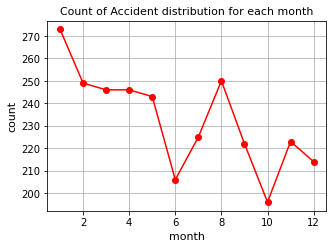

In [74]:
#MONTHLY DISTRIBUTION
df2 = df.groupby('Month').count()

plt.figure(figsize = (5,3.5))
plt.plot(df2.index, df2["Report_Number"], marker='o', color='r')
plt.title('Count of Accident distribution for each month', fontsize=11)
plt.xlabel('month', fontsize=11)
plt.ylabel('count', fontsize=11)
plt.grid(True)
plt.show()

Most accidents occur in January, and dips for the rest of the year, except in August, where there is a second high. October and June have the least occurence of accident in the period 2010 to 2017.


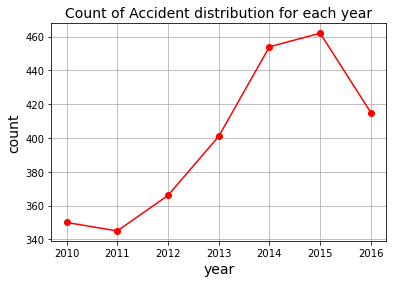

In [72]:
#YEARLY TREND
df2 = df.groupby('Accident_Year').count()
df2.head(13)

plt.plot(df2.index, df2["Report_Number"], marker='o', color='r')
plt.title('Count of Accident distribution for each year', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(True)
plt.show()

This plot is deceiving. Because 2017 data was last collected, it appears the data for 2017 is not available for the whole year, hence the sharp decline. Let us confirm this

In [37]:
subdf2017= df[df['Accident_Year']==2017]
subdf2017.shape


#Alternatively,
#df2 = df.groupby('Accident_Year').count()

(2, 39)

Alas, there are only two rows for the year 2017. We should remove all that pertains to 2017 so as to avoid it skewing our reaults

In [38]:
df.drop(df[df['Accident_Year'] >=2017].index, axis=0, inplace = True)

In [50]:
#To make a fuction for the above

# def timelineplot(df, x, y, title):
#     plt.plot(y, df[x], marker='o' )
#     plt.title(title, fontsize=14)
#     plt.xlabel(x, fontsize=14)
#     plt.ylabel(y, fontsize=14)
#     plt.grid(True)
#     plt.show()
    
# timelineplot(df2, "Report_Number", df.index, 'Count of Accident distribution for each month')

In [51]:
df.tail()

,Report_Number,Supplemental_Number,Accident_Year,Accident_Date_Time,Operator_ID,Operator_Name,Pipeline_Facility_Name,Pipeline_Location,Pipeline_Type,Liquid_Type,Liquid_Subtype,Accident_City,Accident_County,Accident_State,Accident_Latitude,Accident_Longitude,Cause_Category,Cause_Subcategory,Unintentional_Release_Barrels,Intentional_Release_Barrels,Liquid_Recovery_Barrels,Net_Loss_Barrels,Liquid_Ignition,Liquid_Explosion,Pipeline_Shutdown,Shutdown_Date_Time,Restart_Date_Time,Public_Evacuations,Property_Damage_Costs,Lost_Commodity_Costs,Public_Private_Property_Damage_Costs,Emergency_Response_Costs,Environmental_Remediation_Costs,Other_Costs,All_Costs,Month,Day,Hour,Weekday
2788,20170023,22030,2016,2016-12-24 09:35:00,31684,PHILLIPS 66 PIPELINE LLC,"NT-90, PREDO TO CARSON",ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,CUSHING,ARCHER,TX,33.655692,-98.624766,MATERIAL/WELD/EQUIP FAILURE,NON-THREADED CONNECTION FAILURE,202.00,NaN,202.00,0.0,NO,NO,NO,NaN,NaN,0.0,4100.0,10600.0,50000.0,105000.0,87810.0,1000.0,258510,12,24,9,Sat
2789,20170026,22044,2016,2016-12-26 07:20:00,32011,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",RUSSELL STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,CUSHING,GAINES,TX,32.861800,-102.919210,CORROSION,INTERNAL,3.00,NaN,2.00,1.0,NO,NO,YES,12/26/2016 7:20,12/26/2016 10:00,0.0,1000.0,120.0,0.0,2000.0,10000.0,0.0,13120,12,26,7,Mon
2790,20170015,22020,2016,2016-12-27 08:40:00,32334,TC OIL PIPELINE OPERATIONS INC,KEYSTONE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,TINA,CARROLL,MO,39.517036,-93.486055,MATERIAL/WELD/EQUIP FAILURE,THREADED CONNECTION/COUPLING FAILURE,0.25,NaN,0.25,0.0,NO,NO,YES,12/27/2016 8:54,12/27/2016 16:11,0.0,0.0,15.0,0.0,0.0,61000.0,0.0,61015,12,27,8,Tue
2791,20170028,22046,2016,2016-12-28 16:20:00,4906,EXXONMOBIL PIPELINE CO,BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,CUSHING,WEST BATON ROUGE,LA,30.332597,-91.274491,ALL OTHER CAUSES,UNKNOWN,580.00,0.0,0.00,580.0,NO,NO,YES,12/28/2016 16:20,NaN,0.0,0.0,5400.0,0.0,0.0,0.0,100000.0,105400,12,28,16,Wed
2792,20170027,22045,2016,2016-12-29 06:40:00,39145,ENBRIDGE STORAGE (CUSHING) L.L.C.,CUSHING CENTRAL TERMINAL,ONSHORE,TANK,CRUDE OIL,NaN,CUSHING,PAYNE,OK,35.565292,-96.454956,MATERIAL/WELD/EQUIP FAILURE,OTHER EQUIPMENT FAILURE,1.00,NaN,1.00,0.0,NO,NO,NO,NaN,NaN,0.0,7000.0,50.0,0.0,5000.0,3000.0,0.0,15050,12,29,6,Thu


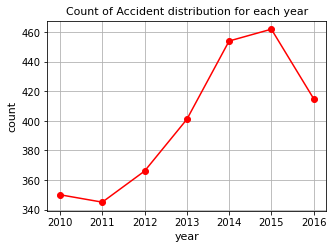

In [71]:
#YEARLY TREND
df2 = df.groupby('Accident_Year').count()
df2.head(13)

plt.figure(figsize = (5,3.5))
plt.plot(df2.index, df2["Report_Number"], marker='o', color='r')
plt.title('Count of Accident distribution for each year', fontsize=11)
plt.xlabel('year', fontsize=11)
plt.ylabel('count', fontsize=11)
plt.grid(True)
plt.show()

There has been an uptrend in the number of occurence of pipeline accidents over the last 6 years. It dipped in 2016, However, we will need data for subsequent years to see whether the dip in 2016 is a trend or just a one-case. 
In this period being studied, 460 is the highest no of times an accident has occured in a year. This occured in 2015. The least cases of accoident was recorded in 2011. All accident that occured in the US has never gone below 350 cases in a year.

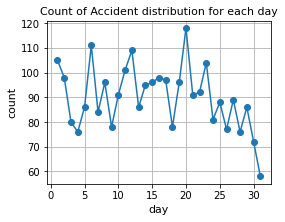

In [68]:
#DAILY TREND
df2 = df.groupby('Day').count()
df2.head(13)

plt.figure(figsize = (4,3))
plt.plot(df2.index, df2["Report_Number"], marker='o')
plt.title('Count of Accident distribution for each day', fontsize=11)
plt.xlabel('day', fontsize=11)
plt.ylabel('count', fontsize=11)
plt.grid(True)
plt.show()

Anything to see from the daily plot?
Accidents occur least in the last few days of the month. Or we might as well notice that the dip is because not all months of the year has 31 days.

### - Where do these pipeline accident occur?

Most of the accidents that happened were concentrated at a particular region, with a few scattered around the other parts of the US. 

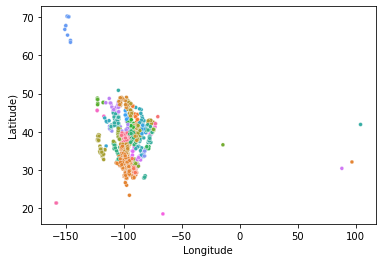

In [55]:
#Altrnatively
#Map of accidents
sns.scatterplot(x= 'Accident_Longitude', y='Accident_Latitude', data=df, hue='Accident_State',s=15, legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

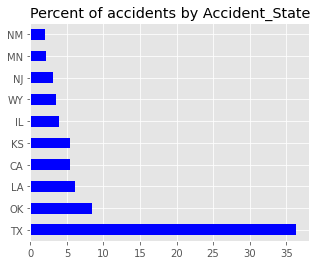

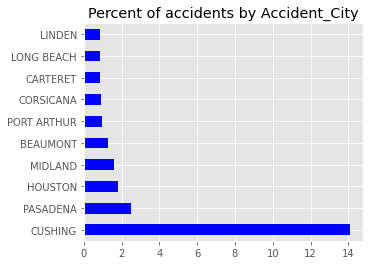

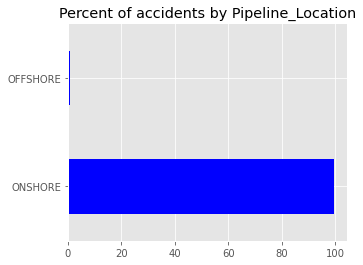

In [139]:
#DISTRIBUTION PLOTS FOR CATEGORICAL COLUMNS related to location



def distrib_plot(df, cat_cols):
    '''#function to plot distribution plot(bar) of the first 10 categories in a list of categorical columns'''
    for cat_col in cat_cols:
        plt.figure(figsize = (5,4))
        first_te= df[cat_col].value_counts(ascending=False, normalize=True)*100
        first_ten = first_te.head(10)
        first_ten.plot(kind='barh',color='b')
        plt.title("Percent of accidents by " +cat_col)
        #plt.savefig('city.png')
        
        
location_cols = ["Accident_State","Accident_City","Pipeline_Location"]       
distrib_plot(df, location_cols )
 
    
    
    
#Alternatively        
# '''

# def plot_bars(auto_prices, cols):
#     for col in cols:
#         fig = plt.figure(figsize=(6,6)) # define plot area
#         ax = fig.gca() # define axis    
#         counts = auto_prices[col].value_counts() # find the counts for each unique category
#         counts.plot.bar(ax = ax, color = 'r') # Use the plot.bar method on the counts data frame
#         ax.set_title('Number of autos by' + col) # Give the plot a main title
#         ax.set_xlabel(col) # Set text for the x axis
#         ax.set_ylabel('Number of autos')# Set text for y axis
#         plt.show()

# '''   


In [146]:
def barrels_lost(cat_cols):
    '''A function to perform groupby on categorical columns based on the quantity of barrel lost.'''
    for cat_col in cat_cols:
        by_barrels = df.groupby([cat_col])["Unintentional_Release_Barrels"].sum()
        print(by_barrels )
        print(   )
        print(   )
       
        
cat_cols = ["Accident_State", "Accident_City"]
barrels_lost(cat_cols)


Accident_State
AK      2902.74
AL     12867.26
AR      9166.61
CA     12407.35
CO      2319.38
CT       600.95
FL      1090.39
GA      3310.02
HI      1317.00
IA      4497.33
ID       265.71
IL     39031.21
IN      5085.67
KS     15261.56
KY       254.11
LA     49121.64
MA        11.20
MD         9.67
ME         0.12
MI     31765.39
MN      6445.49
MO      6919.73
MS       945.79
MT      3019.07
NC       382.76
ND     34503.51
NE      6028.85
NJ      1609.02
NM     11204.73
NV         5.75
NY      4189.63
OH      3155.87
OK     41705.66
OR         4.33
PA      7871.09
PR        66.00
SC     11102.86
SD       937.70
TN        99.13
TX    194072.70
UT      1843.24
VA       150.75
WA        12.36
WI      3432.86
WV     41970.00
WY      6283.74
Name: Unintentional_Release_Barrels, dtype: float64


Accident_City
11.5 MILES NORTH OF MCKITTRICK, CA ON HWY 33      9.29
760 ROOSEVELT AVENUE                             75.08
799 SOUTH SEASIDE AVENUE, TERMINAL ISLAND         1.30
ABERDEEN        

Over 35% of pipeline accidents thsat occured occur in Texas. 
Texas has the most cases and most barrels released in the timeframe being studied.

Amost 100 percent of all accidents are onshore.
Cushing, Oklahoma is the worst hit city with up to 14 percent of all cases recorded here.

In [147]:
#The below steps are in order to embed the next visualisations(map) on Medium blog using Plotly
# To upload the visualization to your plotly account

username='oladipod'
api_key='t1wXAiEJmZB8GazYWO9Z'

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)


In [127]:
import chart_studio.plotly as py
import chart_studio.tools as tls


In [128]:
plt.style.use('ggplot')
import plotly.graph_objects as go


data_geo = pd.value_counts(df['Accident_State'])


fig = go.Figure(data=go.Choropleth(
    locations=data_geo.index,
    z = data_geo.values.astype(float),
    locationmode = 'USA-states',     
    colorscale = 'YlOrRd',
    colorbar_title = "Total Frequency",
))

fig.update_layout(
    title_text = 'Frequency Distribution of Pipeline Accidents by States (US)',
    geo_scope='usa',
)

fig.show()
# plt.savefig('map.png')


In [129]:

#To Push your visualiztion to your account, i.e to host the chart live on Plotly
import chart_studio.plotly as py
py.plot(fig, filename = 'Accidentstate', auto_open=True, encoding='utf-8')

'https://plotly.com/~oladipod/1/'

In [130]:
'''
def hist_plot(df, num_cols):
    #function to plot histograms of the distr of numerical columns
    for num_col in num_cols:
        plt.figure(figsize = (8,7))
        df[cat_col].value_counts().head(10).plot(kind='hist',color='b')
        plt.title("histograsm of" +num_col)
        #plt.savefig('city.png')
        
        
num_cols = ["", "", ""]       
distrib_plot(df, num_cols)

'''
 

'\ndef hist_plot(df, num_cols):\n    #function to plot histograms of the distr of numerical columns\n    for num_col in num_cols:\n        plt.figure(figsize = (8,7))\n        df[cat_col].value_counts().head(10).plot(kind=\'hist\',color=\'b\')\n        plt.title("histograsm of" +num_col)\n        #plt.savefig(\'city.png\')\n        \n        \nnum_cols = ["", "", ""]       \ndistrib_plot(df, num_cols)\n\n'

### What are the major causes of pipeline accidents?

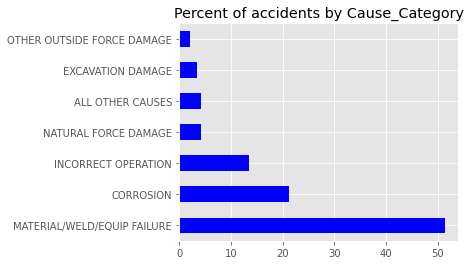

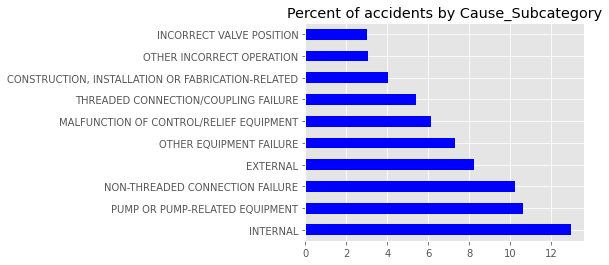

In [133]:
distrib_plot(df, ['Cause_Category', 'Cause_Subcategory'] )

Material failure and corrosion accounts for up to 70percent of all accidents. 

### Is there a relationship between the costs and quantity of barrels lost?

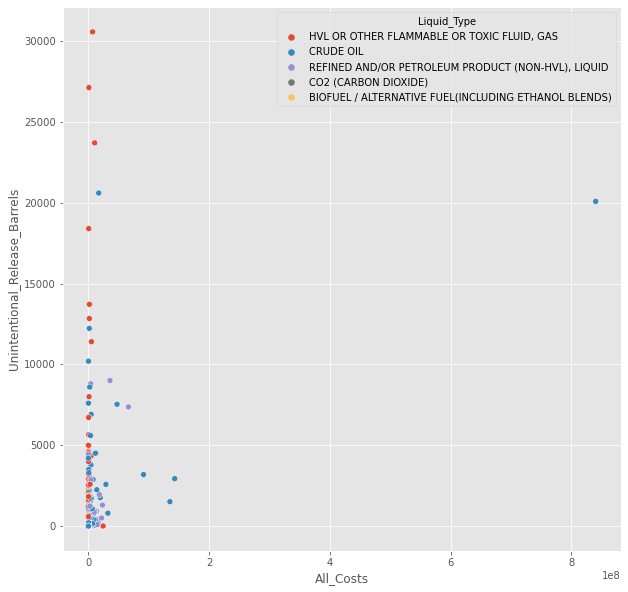

In [165]:
plt.figure(figsize = (10,10))
sns.scatterplot(y ="Unintentional_Release_Barrels", x ="All_Costs", 
           hue="Liquid_Type", data = df);

The cost is not really afected by the quantity of barrels released. However, it seems that for crude oil, there are outliers in which there costs are higher for more barels released. Is this a univariate or multivariate outlier?

Text(0.5, 0, 'Crime rate per capita')

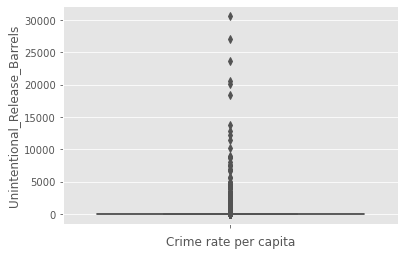

In [169]:
#Now, we will find and remove the outlier and see the behaviour again
#df.describe()


ax = sns.boxplot(y=df["Unintentional_Release_Barrels"])
ax.set_xlabel('Crime rate per capita')

Text(0.5, 0, 'Crime rate per capita')

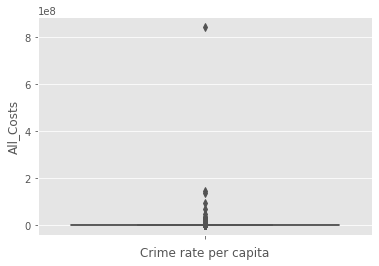

In [170]:
ax = sns.boxplot(y=df["All_Costs"])
ax.set_xlabel('Crime rate per capita')

In [175]:
#replace outlier with median
the_median = df['All_Costs'].median()
df.loc[df.All_Costs > the_median, 'All_Costs'] = np.nan
df.fillna(the_median,inplace=True)



/Users/oladipooluwadamilola/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning:

Mean of empty slice



Text(0.5, 0, 'Crime rate per capita')

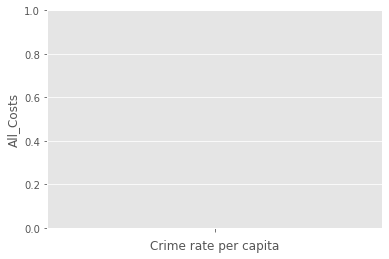

In [176]:
ax = sns.boxplot(y=df["All_Costs"])
ax.set_xlabel('Crime rate per capita')

### - What factors relate to evacuation(fatalities) and cost ?

What liquids are more likely to cause fatality and cost more?
Is there a relationship between costs and liquid type? cost and barrels qty lost

In [ ]:


other_cat_cols =['Operator_Name','Pipeline_Facility_Name', 'Pipeline_Type', 'Liquid_Type', 'Cause_Category', 
                'Cause_Subcategory', 'Liquid_Ignition', 'Liquid_Explosion', 'Pipeline_Shutdown']

distrib_plot(df, other_cat_cols )

?? How to change the ordering of the above plots

### - Analysing the level of damage(measured by cost) based on the liquid type and operators

In [148]:
def cost_implication(cat_cols):
    '''A function to perform groupby on categorical columns based on the cost implications'''
    for cat_col in cat_cols:
        by_cause = df.groupby([cat_col])['All_Costs'].median()
        print(by_cause )
        print(   )
        print(   )
       
        
cat_cols = ["Pipeline_Location",  "Pipeline_Shutdown",
            "Pipeline_Type", "Liquid_Type", "Cause_Category"]
cost_implication(cat_cols)

Pipeline_Location
OFFSHORE    361651
ONSHORE      23000
Name: All_Costs, dtype: int64


Pipeline_Shutdown
NO     15000
YES    32599
Name: All_Costs, dtype: int64


Pipeline_Type
ABOVEGROUND         9582.5
TANK               30210.0
TRANSITION AREA    16165.0
UNDERGROUND        80000.0
Name: All_Costs, dtype: float64


Liquid_Type
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)    30500
CO2 (CARBON DIOXIDE)                                     6258
CRUDE OIL                                               22412
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS              17414
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID      27135
Name: All_Costs, dtype: int64


Cause_Category
ALL OTHER CAUSES                20500
CORROSION                       46090
EXCAVATION DAMAGE              193841
INCORRECT OPERATION             12500
MATERIAL/WELD/EQUIP FAILURE     15030
NATURAL FORCE DAMAGE            48200
OTHER OUTSIDE FORCE DAMAGE     273100
Name: All_Costs, dtype: int64




       
the All-cost and "Unintentional_Release_Barrels"  column is right skewed, median is a better way to get an average

In [339]:
def barrels_lost(cat_cols):
    '''A function to perform groupby on categorical columns based on the quantity of barrel lost.'''
    for cat_col in cat_cols:
        by_barrels = df.groupby([cat_col])["Unintentional_Release_Barrels"].mean()
        print(by_barrels )
        print(   )
        print(   )
       
        
cat_cols = ["Pipeline_Location",  "Pipeline_Shutdown",
            "Pipeline_Type", "Liquid_Type", "Cause_Category"]
barrels_lost(cat_cols)

Pipeline_Location
OFFSHORE     17.192778
ONSHORE     208.626472
Name: Unintentional_Release_Barrels, dtype: float64


Pipeline_Shutdown
NO      82.009739
YES    299.928052
Name: Unintentional_Release_Barrels, dtype: float64


Pipeline_Type
ABOVEGROUND         49.135945
TANK               157.710764
TRANSITION AREA     67.653750
UNDERGROUND        464.820833
Name: Unintentional_Release_Barrels, dtype: float64


Liquid_Type
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)      1.760000
CO2 (CARBON DIOXIDE)                                    213.724211
CRUDE OIL                                               156.572835
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS              606.486651
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID      105.414947
Name: Unintentional_Release_Barrels, dtype: float64


Cause_Category
ALL OTHER CAUSES               273.614103
CORROSION                      133.710997
EXCAVATION DAMAGE              735.579278
INCORRECT OPERATION            109.856048
MA

### General Analysis

### Working with Categorical and Numerical Features

In [324]:
#Divide all columns into either categorical or numerical
all_cat_list = ["Accident_Year","Operator_Name","Pipeline_Facility_Name", "Pipeline_Location",
            "Pipeline_Type", "Liquid_Type", "Accident_City",
            "Accident_County", "Accident_State", "Cause_Category", "Cause_Subcategory",
            "Pipeline_Shutdown", "Month", "Day", "Hour"]

all_num_list = ["Unintentional_Release_Barrels", "Liquid_Recovery_Barrels", "Net_Loss_Barrels", 
            "Liquid_Ignition","Liquid_Explosion", "Pipeline_Shutdown", "Public_Evacuations", 
            "Property_Damage_Costs", "Lost_Commodity_Costs","Public_Private_Property_Damage_Costs", 
            "Emergency_Response_Costs","Environmental_Remediation_Costs", 
            "Other_Costs", "All_Costs"]

col_to_drop =['Report_Number', 'Supplemental_Number', 'Accident_Date_Time', 'Operator_ID']

#### General Observations

#### Descriptive Statistics for Categorical Variables

In [41]:
#Find the no of unique for each categorical variables

for cat in all_cat_list:
    print(cat, ": {}".format(df[cat].nunique()))
    

Accident_Year : 8
Operator_Name : 229
Pipeline_Facility_Name : 1977
Pipeline_Location : 2
Pipeline_Type : 4
Liquid_Type : 5
Accident_City : 1027
Accident_County : 678
Accident_State : 46
Cause_Category : 7
Cause_Subcategory : 38
Pipeline_Shutdown : 2
Month : 12
Day : 31
Hour : 24


+the following columns(-pipeline facility name, accident city, accident county, operator name) have too many unique categories and may not provide much information. We can check for the top 5 or top 10 unique categories for them instead

In [32]:
#define a fxn that takes in a list of cat variables and returns the valuecount in percent
for cat in all_cat_list:
    print(pd.value_counts(df[cat],normalize=True)*100)
    print('\n')
    
    

2015    16.529517
2014    16.243292
2016    14.847943
2013    14.347048
2012    13.094812
2010    12.522361
2011    12.343470
2017     0.071556
Name: Accident_Year, dtype: float64


ENTERPRISE CRUDE PIPELINE LLC                        6.976744
SUNOCO PIPELINE L.P.                                 6.440072
PLAINS PIPELINE, L.P.                                5.581395
ENTERPRISE PRODUCTS OPERATING LLC                    5.545617
MAGELLAN PIPELINE COMPANY, LP                        5.008945
                                                       ...   
TEXSTAR MIDSTREAM LOGISTICS, LP                      0.035778
TRI-STATES NGL PIPELINE LLC                          0.035778
TESORO LOGISTICS OPERATIONS LLC - MOUNTAIN REGION    0.035778
WESTERN REFINING PIPELINE COMPANY                    0.035778
FREEPORT-MCMORAN OIL & GAS                           0.035778
Name: Operator_Name, Length: 229, dtype: float64


WYOMING PIPELINE COMPANY         5.044723
CUSHING TERMINAL                 0.644007
C

From the result for Cause_subcategory, we see that up to 55percent of the accidents are cause by technical problems, which might have been avoided by proper checking and mantenance culture.

Accidents are more frequent in the city Cushing, and in the county Harris.

We see that most accidents occured in Texas, accounting for up to 36% of all recorded accidents!

Wyoming pipeline compamy is the pipeline facility most susceptible to accidents.

Some of the categorical columns have too many unique labels for the size 
of the dataset we are working with (just 2795 records).  Also, 
the distribution (valuecounts) for some of them do not have good variance
It ll be preferred to remove them as they provide little to no useful information for now. Also, geographical information such as latitude and longitude will not be considered.
 

In [42]:
#Update Col_to_drop list with this new development
col_to_drop =['Report_Number', 'Supplemental_Number', 'Accident_Date_Time', 'Operator_ID', 
             'Accident_Latitude', 'Accident_Longitude', "Cause_Subcategory", "Accident_City", 
              "Accident_County"]
              
              

In [119]:
all_cat_list = ["Accident_Year","Operator_Name","Pipeline_Facility_Name", "Pipeline_Location",
            "Pipeline_Type", "Liquid_Type", "Accident_State", "Cause_Category",
            "Pipeline_Shutdown", "Month", "Day", "Hour", "Weekday"]


### Visualisations of Accident distribution

In [347]:
import matplotlib
matplotlib.style.use('ggplot')


apple_fplot = df.groupby(['Accident_Year','Liquid_Type'])['Unintentional_Release_Barrels'].mean()
# plot_df = apple_fplot.unstack('Liquid_Type').loc[:, 'Unintentional_Release_Barrels']
# plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='CRUDE OIL')
# plot_df.plot() 
apple_fplot

Accident_Year  Liquid_Type                                         
2010           CO2 (CARBON DIOXIDE)                                      54.863333
               CRUDE OIL                                                337.927885
               HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               633.955238
               REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID        60.586320
2011           CO2 (CARBON DIOXIDE)                                     635.440000
               CRUDE OIL                                                242.161370
               HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               386.938333
               REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       189.864472
2012           CO2 (CARBON DIOXIDE)                                       9.515000
               CRUDE OIL                                                 79.498942
               HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               522.842927
               REFI

<Figure size 1440x720 with 0 Axes>

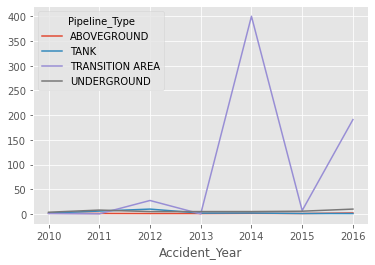

<Figure size 1440x720 with 0 Axes>

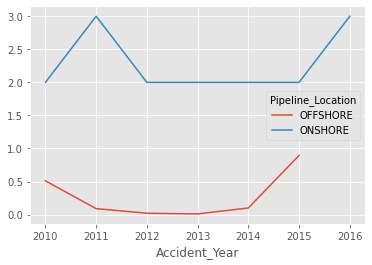

<Figure size 1440x720 with 0 Axes>

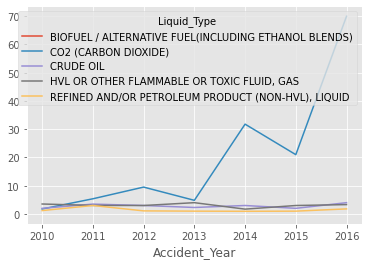

<Figure size 1440x720 with 0 Axes>

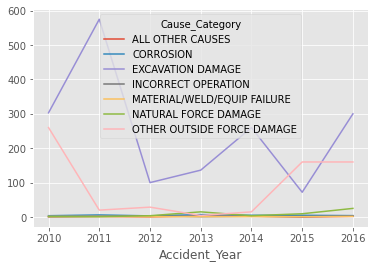

<Figure size 1440x720 with 0 Axes>

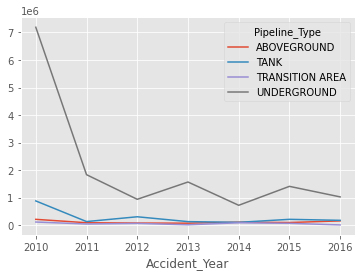

<Figure size 1440x720 with 0 Axes>

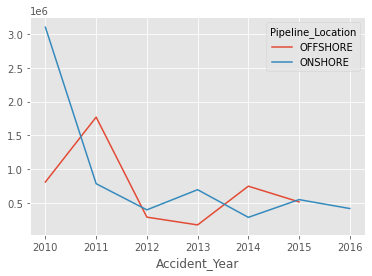

<Figure size 1440x720 with 0 Axes>

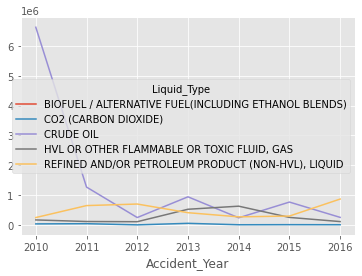

<Figure size 1440x720 with 0 Axes>

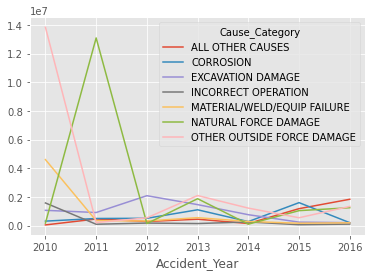

In [150]:
import matplotlib
matplotlib.style.use('ggplot')

to_plot=['Pipeline_Type', 'Pipeline_Location', 'Liquid_Type', "Cause_Category"]


for i in to_plot:
    plt.figure(figsize=(20,10))
    df.groupby(['Accident_Year', i])['Unintentional_Release_Barrels'].median().unstack().plot()
    

    
for i in to_plot:
    plt.figure(figsize=(20,10))
    df.groupby(['Accident_Year', i])['All_Costs'].mean().unstack().plot()
    
       
# for i in to_plot:
#     plt.figure(figsize=(20,10))
#     df.groupby(['Accident_Year', i])['Public_Evacuations'].mean().unstack().plot()
#     print(i,'Public_Evacuations')

https://pwypindonesia.org/en/understanding-the-onshore-and-offshore-schemes-in-the-upstream-oil-and-gas-industry/

In [ ]:

what kind of accident is most popular in the biggest cities where accident occur
what percentge of the accident ios caused by natural force and manmade reasons
